# <font color='red'>UPDATE VALUES: Name of Files, Distance, redshift, Type, Scale Factor, CropImage, Text Coordinate (if needed)</font> 

In [538]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from matplotlib.colors import LogNorm

######################### UPDATE ############################
##############################################################
##############################################################

# Files Names #

# Narrow Filter File:
hdu1 = fits.open(get_pkg_data_filename('hst_9788_57_acs_wfc_f658n_drz.fits'))

# Broad Filter File:
hdu2 = fits.open(get_pkg_data_filename('hst_9788_57_acs_wfc_f814w_drz.fits'))

# DISTANCE
distance_Mpc = 16

# Galaxy Type
Gtype = 'Sy1'

# REDSHIFT
redshift = 0.00371

# Scale Factor Between Both Filters
k = 0.03302642702430958

# CropImage [r1:r2, c1:c2]
r1 = 2100
r2 = 4000
c1 = 2800
c2 = 4600

# Text Coordinate
t_c_x = 100
t_c_y = 150

##############################################################
##############################################################
#############################################################


### NO EDIT ###

# Galaxy Name & Filter Names
name = hdu1[0].header['TARGNAME']
broad_filter = hdu2[0].header['FILTER2']
narrow_filter = hdu1[0].header['FILTER1']

name_broad = name + '/' + broad_filter
name_narrow = name + '/' + narrow_filter

#NPHOTFLAM
NPHOTFLAM = hdu1[1].header['PHOTFLAM']
NPHOTPLAM = hdu1[1].header['PHOTPLAM']

#BPHOTFLAM
BPHOTFLAM = hdu2[1].header['PHOTFLAM']
BPHOTPLAM = hdu2[1].header['PHOTPLAM']

#Exposure Time
EXPTIME = hdu1[0].header['EXPTIME']

# Mean SNR
NSNRMEAN = hdu1[1].header['SNRMEAN']
BSNRMEAN = hdu2[1].header['SNRMEAN']


In [539]:
hdu1[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5484                                                  
NAXIS2  =                 5472                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
CD1_1   = -1.3888888888888E-

In [540]:
hdu1[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5484                                                  
NAXIS2  =                 5472                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
CD1_1   = -1.3888888888888E-

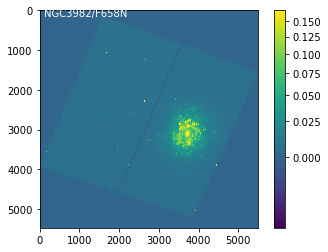

In [541]:
Nimg = hdu1[1].data
Nnorm1 = simple_norm(hdu1[1].data, 'sqrt', percent=99.8)
plt.imshow(Nimg, norm=Nnorm1)
plt.text(t_c_x, t_c_y, name_narrow, color='white')
plt.colorbar()

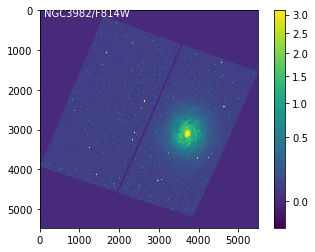

In [542]:
Bimg = hdu2[1].data
Bnorm1 = simple_norm(hdu2[1].data, 'sqrt', percent=99.8)
plt.imshow(Bimg, norm=Bnorm1)
plt.text(t_c_x, t_c_y, name_broad, color='white')
plt.colorbar()

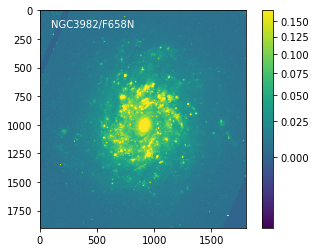

In [543]:
Nimg = hdu1[1].data
Nimg = Nimg[ r1: r2, c1 : c2]
Nnorm1 = simple_norm(hdu1[1].data, 'sqrt', percent=99.8)
plt.imshow(Nimg, norm=Nnorm1)
plt.text(t_c_x, t_c_y, name_narrow, color='white')
plt.colorbar()

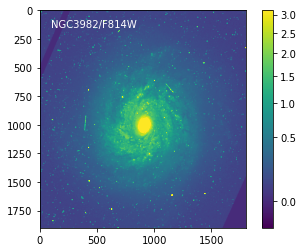

In [544]:
Bimg = hdu2[1].data
Bimg = Bimg[ r1: r2, c1 : c2]
Nnorm2 = simple_norm(hdu2[1].data, 'sqrt', percent=99.8)
plt.imshow(Bimg, norm=Nnorm2)
plt.text(t_c_x, t_c_y, name_broad, color='white')
plt.colorbar()

In [545]:
from photutils.centroids import centroid_com, centroid_quadratic
from photutils.centroids import centroid_1dg, centroid_2dg
x1, y1 = centroid_2dg(Bimg)
print((x1, y1)) 

(903.8494144315421, 1001.5602247069008)


 - If exposure time weighting (EXP) was used, the final image could be multiplied by the weight image to get the number of source counts in each pixel to
estimate photon noise. 
Ref: (page 89) http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=C62D857D439060323B2A6E5851686358?doi=10.1.1.259.8283&rep=rep1&type=pdf

- EXP: the final image is weighted by the input image exposure times. This option is
provided as the default since it produces reliable weighting for all types of data, including
older instruments (eg., WFPC2) where more sophisticated options may not be available.
This weighting is a good approximation in the regime where the sky noise dominates.
Ref: (page 80) http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=C62D857D439060323B2A6E5851686358?doi=10.1.1.259.8283&rep=rep1&type=pdf

- The second extension of the output image contains the weight (WHT)
image. This image gives the relative weight of the output pixels and, in
standard processing using the MultiDrizzle defaults, it can be considered
an effective exposure time map, if the default value of ‘final_wht_type’ is
set to ’EXP’. 
Ref:(page 56)
http://guaix.fis.ucm.es/~agpaz/Instrumentacion_Espacio_2010/Espacio_Docs/HST/hst_dhb_acs.pdf

# <font color='red'>UPDATE VALUES: Annulus Radii</font> 

In [546]:
############################# UPDATE ###########################
##################################################################
##################################################################

R_in = 80
R_out = 850

##################################################################
##################################################################
##################################################################

In [547]:
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAnnulus


aper = CircularAnnulus([x1,y1], R_in , R_out )
Nimg_table = aperture_photometry(Nimg, aper)
Nimg_table['aperture_sum'].info.format = '%.8g'


Nimg_table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,903.8494144315421,1001.5602247069008,63966.675


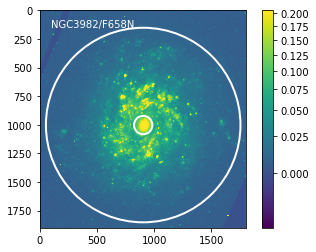

In [548]:
positions = [x1, y1]
Nnorm = simple_norm(Nimg, 'sqrt', percent=99)
plt.imshow(Nimg, norm=Nnorm)
plt.text(t_c_x, t_c_y, name_narrow, color='white')
plt.colorbar()

ap_patches = aper.plot(color='white', lw=2,
                           label='Photometry aperture')

In [549]:
Bimg_table = aperture_photometry(Bimg, aper)
Bimg_table['aperture_sum'].info.format = '%.8g'
Bimg_table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,903.8494144315421,1001.5602247069008,868194.9


# <font color='red'>UPDATE VALUES (background substraction): r_in, r_out</font> 

In [550]:
################ UPDATE ###################################
#############################################################
#############################################################

r_in = 800
r_out = 850

#############################################################
#############################################################
#############################################################

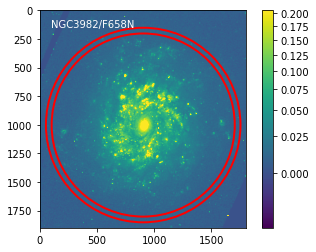

In [551]:
annulus_aperture = CircularAnnulus(positions, r_in=r_in, r_out=r_out)
plt.imshow(Nimg, norm=Nnorm)
plt.text(t_c_x, t_c_y, name_narrow, color='white')
plt.colorbar()

ap_patches = annulus_aperture.plot(color='red', lw=2,
                           label='Photometry aperture')

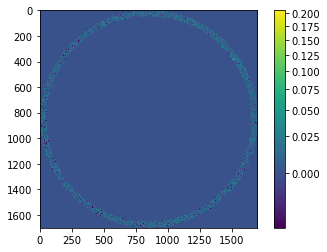

In [552]:
annulus_masks = annulus_aperture.to_mask(method='center')
annulus_data = annulus_masks.multiply(Nimg)
plt.imshow(annulus_data, norm=Nnorm, interpolation='nearest')
plt.colorbar()

In [553]:
mask = annulus_masks.data
annulus_data_1d = annulus_data[mask > 0]
annulus_data_1d.shape

(259199,)

In [554]:
from astropy.stats import sigma_clipped_stats
_, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
print(median_sigclip) 

0.008275915868580341


In [555]:
Nbackground = median_sigclip * aper.area
print(Nbackground)  

18618.28240568223


In [556]:
Nimg_table
bkg_median = median_sigclip
Nimg_table['annulus_median'] = bkg_median
Nimg_table['aper_bkg'] = bkg_median * aper.area
Nimg_table['aper_sum_bkgsub'] = Nimg_table['aperture_sum'] - Nimg_table['aper_bkg']
for col in Nimg_table.colnames:
    Nimg_table[col].info.format = '%.8g'  # for consistent table output
print(Nimg_table)

 id  xcenter   ycenter  aperture_sum annulus_median  aper_bkg aper_sum_bkgsub
       pix       pix                                                         
--- --------- --------- ------------ -------------- --------- ---------------
  1 903.84941 1001.5602    63966.675   0.0082759159 18618.282       45348.393


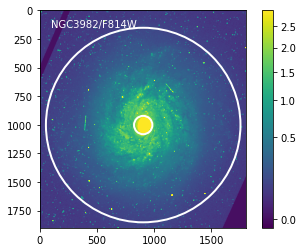

In [557]:
Bnorm = simple_norm(Bimg, 'sqrt', percent=99)
plt.imshow(Bimg, norm=Bnorm)
plt.text(t_c_x, t_c_y, name_broad, color='white')
plt.colorbar()

ap_patches = aper.plot(color='white', lw=2,
                           label='Photometry aperture')

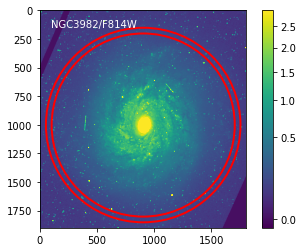

In [558]:
annulus_aperture = CircularAnnulus(positions, r_in=r_in, r_out=r_out)
plt.imshow(Bimg, norm=Bnorm)
plt.text(t_c_x, t_c_y, name_broad, color='white')
plt.colorbar()

ap_patches = annulus_aperture.plot(color='red', lw=2,
                           label='Photometry aperture')

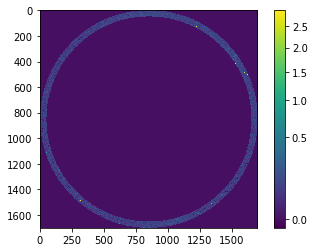

In [559]:
annulus_masks = annulus_aperture.to_mask(method='center')
annulus_data = annulus_masks.multiply(Bimg)
plt.imshow(annulus_data, norm=Bnorm, interpolation='nearest')
plt.colorbar()

In [560]:
mask = annulus_masks.data
annulus_data_1d = annulus_data[mask > 0]
annulus_data_1d.shape

(259199,)

In [561]:
from astropy.stats import sigma_clipped_stats
_, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
print(median_sigclip) 

0.10721855983138084


In [562]:
Bbackground = median_sigclip * aper.area
print(Bbackground)  

241209.004268626


In [563]:
Bimg_table
bkg_median = median_sigclip
Bimg_table['annulus_median'] = bkg_median
Bimg_table['aper_bkg'] = bkg_median * aper.area
Bimg_table['aper_sum_bkgsub'] = Bimg_table['aperture_sum'] - Bimg_table['aper_bkg']
for col in Nimg_table.colnames:
    Bimg_table[col].info.format = '%.8g'  # for consistent table output
print(Bimg_table)

 id  xcenter   ycenter  aperture_sum annulus_median aper_bkg aper_sum_bkgsub
       pix       pix                                                        
--- --------- --------- ------------ -------------- -------- ---------------
  1 903.84941 1001.5602     868194.9     0.10721856   241209        626985.9


In [564]:
Nap = Nimg_table['aper_sum_bkgsub'][0]
Bap = Bimg_table['aper_sum_bkgsub'][0]
print(f'''
Narrow Band Aperture Electrons Per Second: {Nap}
Broad Band Aperture Electrons Per Second: {Bap}
''')



Narrow Band Aperture Electrons Per Second: 45348.3928790163
Broad Band Aperture Electrons Per Second: 626985.8963552453



In [565]:
Nimg = Nimg - Nimg_table['annulus_median']
Bimg = Bimg - Bimg_table['annulus_median']

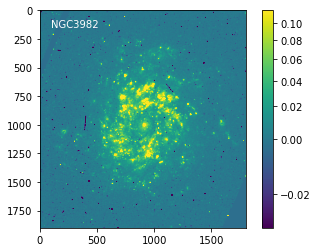

In [566]:
Cimg = (Bimg - Nimg)/(1-k)
Himg = Bimg - Cimg
Hnorm = simple_norm(Himg, 'sqrt', percent=98.5)
plt.imshow(Himg, norm=Hnorm)
plt.text(t_c_x, t_c_y, name, color='white')
plt.colorbar()

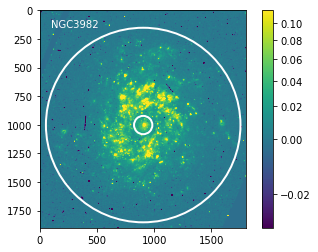

In [567]:
Hnorm = simple_norm(Himg, 'sqrt', percent=98.5)
plt.imshow(Himg, norm=Hnorm)
plt.text(t_c_x, t_c_y, name, color='white')
plt.colorbar()

ap_patches = aper.plot(color='white', lw=2,
                           label='Photometry aperture')

In [568]:
pixelradii = []
Haperradii = []

step = 20
for x in range(R_in + step,R_out,step):
    pixelradii.append(x)
    aper = CircularAnnulus([x1,y1], R_in , x)
    Hphot_table = aperture_photometry(Himg, aper)
    Haperradii.append(Hphot_table['aperture_sum'][0])

print(pixelradii)
print(Haperradii)

[100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840]
[251.95763303512422, 644.0006961324268, 1401.754692050637, 2191.3545964052723, 3126.54575851821, 4446.997168248908, 5979.528851121909, 7626.340422757255, 9095.899539131795, 10690.791553843073, 12509.446526420226, 14523.725297354833, 16027.952997949593, 17379.62935476677, 18473.828533727617, 19189.61665449172, 19754.120704796256, 20378.912650379367, 21079.30626983419, 21834.97861908382, 22452.26895813004, 22860.773031263776, 23249.084249146214, 23566.30470105624, 23809.368391407887, 24082.029612477018, 24364.79409005022, 24595.17296140839, 24794.05413525152, 24892.107422438494, 25131.80505056044, 25325.035187250505, 25474.863157943968, 25556.143090382848, 25603.609651180825, 25515.364853190582, 25511.526012615966, 25498.98285620053]


Text(0.5, 1.0, 'Aperture Counts')

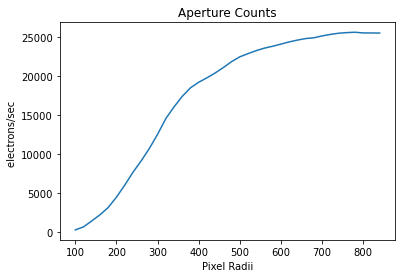

In [569]:
from matplotlib import pyplot as plt
plt.plot(pixelradii, Haperradii)
plt.xlabel("Pixel Radii")
plt.ylabel("electrons/sec ")
plt.title('Aperture Counts')

In [570]:
Hphot_table = aperture_photometry(Himg, aper)
Hphot_table['aperture_sum'].info.format = '%.8g'
Hphot_table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,903.8494144315421,1001.5602247069008,25498.983


In [571]:
Hap = (Nap-k*Bap)/(1-k)
Hap

25482.897998896955

# Defining Upper and Down Errors of Nap and Bap

In [572]:
import math
SNRNap = math.sqrt(Nap*(hdu1[0].header['EXPTIME']))
ERR_Nap = SNRNap/(hdu1[0].header['EXPTIME'])
ERR_Nap

8.04881472010598

In [573]:
SNRBap = math.sqrt(Bap*(hdu1[0].header['EXPTIME']))
ERR_Bap = SNRBap/(hdu1[0].header['EXPTIME'])
ERR_Bap

29.92814958613964

In [574]:
UNap = Nap + ERR_Nap
UBap = Bap + ERR_Bap
DNap = Nap - ERR_Nap
DBap = Bap - ERR_Bap

# Converting Nap and Bap to Total Flux units

In [575]:
NF = Nap * (NPHOTFLAM)
BF = Bap * (BPHOTFLAM)

print(f'''
Value of N FLux is: {NF}
Value of B Flux is: {BF}
''')


Value of N FLux is: 8.82911940958187e-14
Value of B Flux is: 4.361273140963823e-14



# Errors

In [576]:
UNF = UNap * (NPHOTFLAM)
UBF = UBap * (BPHOTFLAM)

print(f'''
Upper value of N FLux is: {UNF}
Upper value of B Flux is: {UBF}
''')


Upper value of N FLux is: 8.830686476058933e-14
Upper value of B Flux is: 4.361481319227015e-14



In [577]:
DNF = DNap * (NPHOTFLAM)
DBF = DBap * (BPHOTFLAM)

print(f'''
Down value of N FLux is: {DNF}
DOwn value of B Flux is: {DBF}
''')


Down value of N FLux is: 8.827552343104807e-14
DOwn value of B Flux is: 4.361064962700631e-14



In [578]:
HF = (NF-k*BF)/(1-k)
#HF = HF
HF = HF*6562.801
HF

5.89452156185428e-10

In [579]:
UHF = (UNF-k*DBF)/(1-k)
DHF = (DNF-k*UBF)/(1-k)

UHF = UHF*6562.801
DHF = DHF*6562.801

print(f'''
Upper value of H FLux is: {UHF}
Down value of H Flux is: {DHF}
''')


Upper value of H FLux is: 5.895589788278438e-10
Down value of H Flux is: 5.893453335430123e-10



In [580]:
HFERR = float(abs(HF-UHF))
HFERR

1.0682264241576156e-13

# SFR

In [581]:
import math
Lum = HF*4*(math.pi)*((distance_Mpc*(3.08568E+24))**2)
Lum

1.8055110936978602e+43

# Error

In [582]:
ULum = UHF*4*(math.pi)*((distance_Mpc*(3.08568E+24))**2)
DLum = DHF*4*(math.pi)*((distance_Mpc*(3.08568E+24))**2)

print(f'''
Upper value of H Lum is: {ULum}
Down value of H Lum is: {DLum}
''')


Upper value of H Lum is: 1.8058382949200726e+43
Down value of H Lum is: 1.8051838924756475e+43



In [583]:
LumERR = float(abs(Lum-ULum))
LumERR

3.272012222124634e+39

In [584]:
SFR = (5.3e-42)*(Lum)
SFR

95.69208796598659

In [585]:
USFR = (5.3e-42)*(ULum)
DSFR = (5.3e-42)*(DLum)

print(f'''
Upper value of SFR is: {USFR}
Down value of SFR is: {DSFR}
''')


Upper value of SFR is: 95.70942963076385
Down value of SFR is: 95.67474630120931



In [586]:
SFRERR = float(abs(SFR-USFR))
SFRERR

0.017341664777262622

In [587]:
print((USFR*100/SFR)-100)

0.018122360109245506


In [588]:
print(f'''

Galaxy Name: {hdu1[0].header['TARGNAME']}
Type: {Gtype}
R.A. : {hdu1[1].header['CRVAL1']}
Decl. : {hdu1[1].header['CRVAL2']}
Redshift: {redshift}
Distance: {distance_Mpc}
Exposure Time (s): {hdu1[0].header['EXPTIME']}
Proposal ID: {hdu1[0].header['PROPOSID']}
Obs. Date: {hdu1[0].header['DATE-OBS']}
Broad Band: {hdu2[0].header['FILTER2']}
Narrow Band: {hdu1[0].header['FILTER1']}
Instrument: {hdu1[0].header['TELESCOP']} / {hdu1[0].header['INSTRUME']} / {hdu1[0].header['APERTURE']}
H alpha Flux: {HF} +/- {HFERR}
H alpha Luminosity: {Lum} +/- {LumERR}
SFR: {SFR} +- {SFRERR}

''')



Galaxy Name: NGC3982
Type: Sy1
R.A. : 179.141062524788
Decl. : 55.12020698647368
Redshift: 0.00371
Distance: 16
Exposure Time (s): 700.0
Proposal ID: 9788
Obs. Date: 2003-12-12
Broad Band: F814W
Narrow Band: F658N
Instrument: HST / ACS / WFC1
H alpha Flux: 5.89452156185428e-10 +/- 1.0682264241576156e-13
H alpha Luminosity: 1.8055110936978602e+43 +/- 3.272012222124634e+39
SFR: 95.69208796598659 +- 0.017341664777262622




In [589]:
data = {
'Galaxy Name': hdu1[0].header['TARGNAME'],
'Type': Gtype,
'R.A.' : hdu1[1].header['CRVAL1'],
'Decl.' : hdu1[1].header['CRVAL2'],
'Redshift': redshift,
'Distance (Mpc)': distance_Mpc,
'Exposure Time (sec)': hdu1[0].header['EXPTIME'],
'Proposal ID': hdu1[0].header['PROPOSID'],
'Obs. Date': hdu1[0].header['DATE-OBS'],
'Broad Band': hdu2[0].header['FILTER2'],
'Narrow Band': hdu1[0].header['FILTER1'],
'Telescope': hdu1[0].header['TELESCOP'],
'Instrument': hdu1[0].header['INSTRUME'],
'Aperture': hdu1[0].header['APERTURE'],
'H alpha Flux (ergs/s/cm2)': HF ,
'Flux error (ergs/s/cm2)': HFERR,
'H alpha Luminosity (ergs/s)': Lum ,
'Luminosity error (ergs/s)': LumERR,
'SFR (Solar M/yr)': SFR ,
'SFR error (Solar M/yr)': SFRERR
}

In [590]:
import pandas as pd
df = pd.DataFrame(data, index=[0])
df

,Galaxy Name,Type,R.A.,Decl.,Redshift,Distance (Mpc),Exposure Time (sec),Proposal ID,Obs. Date,Broad Band,Narrow Band,Telescope,Instrument,Aperture,H alpha Flux (ergs/s/cm2),Flux error (ergs/s/cm2),H alpha Luminosity (ergs/s),Luminosity error (ergs/s),SFR (Solar M/yr),SFR error (Solar M/yr)
0,NGC3982,Sy1,179.141063,55.120207,0.00371,16,700.0,9788,2003-12-12,F814W,F658N,HST,ACS,WFC1,5.894522e-10,1.068226e-13,1.805511e+43,3.272012e+39,95.692088,0.017342
